In [1]:
%matplotlib inline
#
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random as rng
import skimage
import ipywidgets as widgets


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from skimage import data, exposure, io, filters, feature, measure
from skimage.color import rgb2gray

In [2]:
class Load:
    
    def __init__(self):
        return
    
    def img(file):
        img = cv.imread("../res/"+file+".jpg")
        return img
    def photo(i):
        photos = []
        for j in range(1, 19):
            photos.append('projekt' + str(j))
        plt.imshow(Load.img(photos[i]))
        return 

In [3]:
a = interact(Load.photo, i=(0,17, 1));

interactive(children=(IntSlider(value=8, description='i', max=17), Output()), _dom_classes=('widget-interact',…

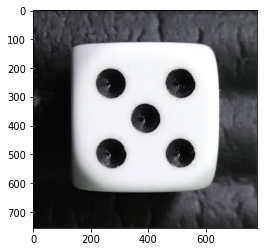

In [3]:
latwe0 = Load.img("latwe0")
plt.imshow(latwe0)

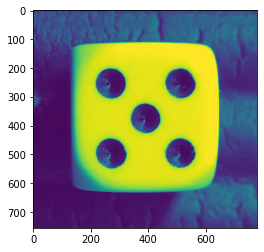

In [5]:
latwe0_grayscale = cv.cvtColor(latwe0, cv.COLOR_RGB2GRAY)
plt.imshow(latwe0_grayscale)

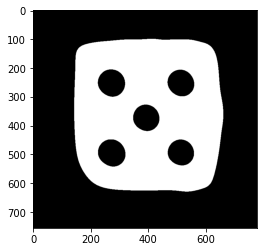

In [6]:
blur = skimage.filters.gaussian(latwe0_grayscale, sigma=20)
thresh = skimage.filters.threshold_otsu(blur)
mask = (blur > thresh)
latwe0_normalized = mask.astype(np.uint8)
plt.imshow(latwe0_normalized, cmap='gray')

6

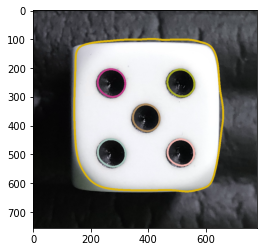

In [20]:
contours, hierarchy = cv.findContours(latwe0_normalized, cv.RETR_TREE, cv.CHAIN_APPROX_NONE) 
drawing = np.zeros((latwe0_normalized.shape[0], latwe0_normalized.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(latwe0, contours, i, color, 5, cv.LINE_8, hierarchy, 0)
plt.imshow(latwe0, cmap='gray')

In [21]:
max_contour = 0
oczka = []
for i in contours:
    if cv.contourArea(i) > max_contour:
        max_contour = cv.contourArea(i)
for i in contours:
    if cv.contourArea(i) != max_contour:
        oczka.append(i)

print(len(oczka))

5


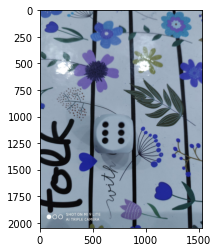

In [10]:
projekt1 = Load.img("projekt1")
plt.imshow(projekt1)
interact()

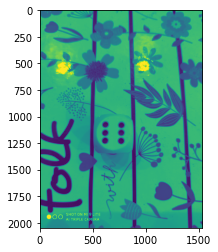

In [11]:
projekt1_grayscale = cv.cvtColor(projekt1, cv.COLOR_RGB2GRAY)
plt.imshow(projekt1_grayscale)

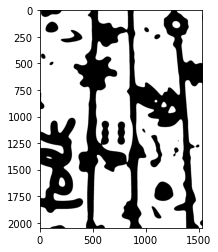

In [12]:
blur = skimage.filters.gaussian(projekt1_grayscale, sigma=20)
thresh = skimage.filters.threshold_otsu(blur)
mask = (blur > thresh)
projekt1_normalized = mask.astype(np.uint8)
plt.imshow(projekt1_normalized, cmap='gray')

5


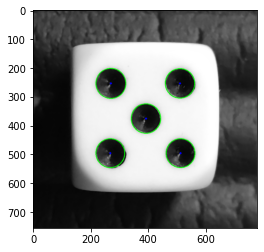

In [7]:
img = cv.imread('../res/latwe0.jpg',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=500,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
print(len(circles[0]))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
plt.imshow(cimg)



In [49]:
def count_blobs(image):
    params = cv.SimpleBlobDetector_Params()
    params.filterByColor = True
    params.blobColor = 255
    params.minArea = 500
    # Disable the default settings
    params.filterByInertia = False
    params.filterByConvexity = False
    detector = cv.SimpleBlobDetector_create(params)
    keypoints = detector.detect(image)
    im_with_keypoints = cv.drawKeypoints(
        image, keypoints, np.array([]), (0,0,255),
        cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    return keypoints, im_with_keypoints

def threshold(img_in, value):
    img_out = img_in.copy()
    map, img_out = cv.threshold(img_out, value, 255, cv.THRESH_BINARY)
    return img_out

Number of Pips: 5


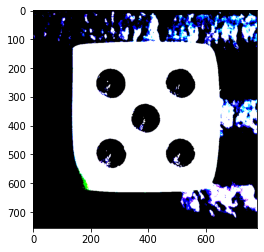

In [54]:
#latwe0 threshold(latwe0, 85)
#latwe1 threshold(255-latwe0, 150)
#latwe2 threshold(latwe0, 50)
#latwe3 threshold(latwe0, 60)
#latwe4 threshold(latwe0, 208)
#latwe5 threshold(latwe0, 140)
#latwe6 za ciemne
#latwe7 threshold(latwe0, 93)
#latwe8 threshold(latwe0, 93)
#latwe9 threshold(255-latwe0, 130)

latwe0 = Load.img("latwe0")
latwe0_grayscale = cv.cvtColor(latwe0, cv.COLOR_RGB2GRAY)

blur = skimage.filters.gaussian(latwe0_grayscale, sigma=20)
thresh = skimage.filters.threshold_otsu(blur)
mask = (blur > thresh)
latwe0_normalized = mask.astype(np.uint8)

threshold_image = threshold(latwe0, 85)

blobs, kp_image = count_blobs(threshold_image)
print("Number of Pips: " + str(len(blobs)))

plt.imshow(threshold_image, cmap='gray')